In [1]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import os

In [2]:
import pandas as pd
data=pd.read_csv("D:/data/classification_data/stress_data/stress_300.csv")
print(data.head())

   Humidity  Temperature  Step count  Stress Level
0     21.33        90.33         123             1
1     21.41        90.41          93             1
2     27.12        96.12         196             2
3     27.64        96.64         177             2
4     10.87        79.87          87             0


In [5]:
y=data[["Stress Level"]]
x=data.drop(["Stress Level"],axis=1)

In [6]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 648 candidates, totalling 1944 fits


c:\Users\JOHN\anaconda3\envs\AML\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
217 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\JOHN\anaconda3\envs\AML\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\JOHN\anaconda3\envs\AML\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\JOHN\anaconda3\envs\AML\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "c:\User

Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


### Data Preprocessing

In [3]:
import os

In [4]:
os.chdir("../")

In [5]:
%pwd

'd:\\Silent_Night\\mlops\\AML_Classification'

In [6]:
import pandas as pd
df=pd.read_csv("artifacts/data_ingestion/data.csv")
print(df.head())

          Timestamp  from_bank    Account   to_bank    account  \
0  2022/09/01 00:02       70.0  10042B660   22661.0  805F7F2B0   
1  2022/09/01 00:19       70.0  10042B660  212996.0  80609B4C0   
2  2022/09/01 00:01       70.0  10042B660   11305.0  807861770   
3  2022/09/01 00:00    11968.0  815630C40  249349.0  815635220   
4  2022/09/01 00:25       70.0  10042B660   11968.0  816F93AF0   

   amount_received receiving_currency  amount_paid Payment_Currency  \
0         70831.64          US Dollar     70831.64        US Dollar   
1         33705.47          US Dollar     33705.47        US Dollar   
2       1097976.27          US Dollar   1097976.27        US Dollar   
3           892.33          US Dollar       892.33        US Dollar   
4          1808.14          US Dollar      1808.14        US Dollar   

  Payment Format  is_laundering  
0           Cash            1.0  
1           Cash            1.0  
2           Cash            1.0  
3            ACH            1.0  
4     

In [20]:
print(df.dtypes)
#Get the unquie value count for categorical variable
l=["receiving_currency","Payment_Currency","Payment Format","is_laundering"]
for i in l:
    print("\n")
    print(processed_df[[i]].value_counts())

Timestamp              object
from_bank             float64
Account                object
to_bank               float64
account                object
amount_received       float64
receiving_currency     object
amount_paid           float64
Payment_Currency       object
Payment Format         object
is_laundering         float64
dtype: object


receiving_currency
12                    3622
4                     2466
14                     408
8                      392
10                     380
7                      337
13                     308
11                     285
0                      278
9                      274
3                      256
6                      255
1                      234
5                      181
2                      162
Name: count, dtype: int64


Payment_Currency
12                  3634
4                   2463
14                   412
8                    392
10                   380
7                    337
13                   309
11        

In [8]:
print(df.isnull().sum())

Timestamp             0
from_bank             0
Account               0
to_bank               0
account               0
amount_received       0
receiving_currency    0
amount_paid           0
Payment_Currency      0
Payment Format        0
is_laundering         0
dtype: int64


In [9]:
l=["account"]
for i in l:
    print("\n")
    print(df[[i]].value_counts())




account  
811C599A0    26
8021353D0    21
811C597B0    21
80266F880    19
811ED7DF0    19
             ..
80617B250     1
806174CC0     1
8061702B0     1
8061682F0     1
81C1E4A41     1
Name: count, Length: 8806, dtype: int64


In [10]:
df1=df.drop(["Timestamp","Account","account"],axis=1)

In [11]:

# Lists to hold column names
cate = []
contin = []

# Iterate over DataFrame columns and check data types
for col in df1.columns:
    if df[col].dtype == 'object':
        cate.append(col)
    elif df[col].dtype == 'float64':
        contin.append(col)

# Print results
print("Categorical columns:", cate)
print("Continuous columns:", contin)

Categorical columns: ['receiving_currency', 'Payment_Currency', 'Payment Format']
Continuous columns: ['from_bank', 'to_bank', 'amount_received', 'amount_paid', 'is_laundering']


#### Check for corelation in continous feature using heatmap


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def heatmap(df,title):
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1)
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

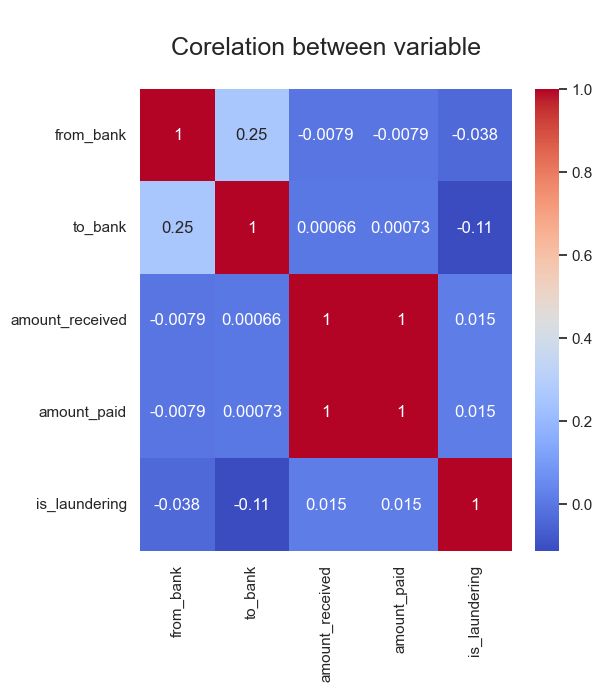

In [14]:
data=df1[contin]
heatmap(data,"Corelation between variable")
#Conlusion there is not high corelation among independent variable

In [15]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,8))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

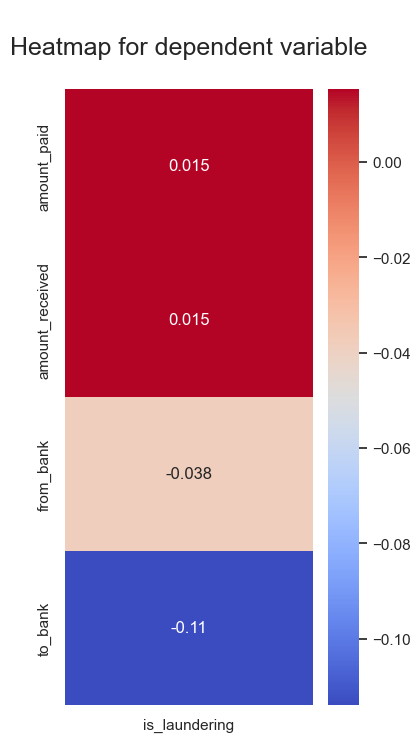

In [16]:
heatmap1_df=df[['from_bank', 'to_bank', 'amount_received', 'amount_paid', 'is_laundering']]
corr_for_target(heatmap1_df,"is_laundering",title= "Heatmap for dependent variable")

SyntaxError: invalid syntax (3231478432.py, line 1)

In [19]:
#label encoding
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize the LabelEncoder and StandardScaler
label_encoder = LabelEncoder()
standard_scaler = StandardScaler()
processed_df=pd.DataFrame()
encode=['receiving_currency', 'Payment_Currency', 'Payment Format',"is_laundering"]
scale=['from_bank', 'to_bank', 'amount_received', 'amount_paid']
for i in encode:
    processed_df[i]=label_encoder.fit_transform(df[i])

for i in scale:
    processed_df[i]=standard_scaler.fit_transform(df[[i]])

#Add the dependent feature to the data
#processed_df["is_laundering"]=df["is_laundering"]

print(processed_df)

      receiving_currency  Payment_Currency  Payment Format  is_laundering  \
0                     12                12               2              1   
1                     12                12               2              1   
2                     12                12               2              1   
3                     12                12               0              1   
4                     12                12               3              1   
...                  ...               ...             ...            ...   
9833                  12                 4               0              0   
9834                  12                12               3              0   
9835                  12                12               0              0   
9836                   4                 4               5              0   
9837                  12                12               0              0   

      from_bank   to_bank  amount_received  amount_paid  
0     -0.590439 -